<h1 align='center'>Milestone 1: Proposal</h1>
<h3 align='center'>Group 5：</h3>
<h4 align='center'>Abby Ross | Joseph Distler | Nathan Dierkes | Viraj Vilas Rane | Xinyue Chen | Yinkai Xiong</h4>

<h2 align="center">Introduction</h2>

<h3>Business Problem: </h3>

Airbnb is a company that provides a platform users classified as homeowners to rent out rooms, or the entire house, to any of the Airbnb users classified as renters.  This is primarily done in high tourism locations, but is also fairly prevelant in most of the large US cities.  Airbnb would like to increase its user base by identifying potential hosts to convince them to use their property as a rental location. Airbnb receives a percentage of the profit that the rentals on their platform create; therefore it is in their best interest to grow the number of rental properties for their potential customers. The company has already gathered a large amount of data on its current listings and has come to our group to analyze said data. They would like to provide the hosts with suggestions for their property descriptions, which amenities to offer, etc., and use these values to predict the ratings, listing prices, booking percentage of available dates, and more. To pilot this idea, the company would like to focus on one city in the United States before rolling this predictive model out to other locations. The dataset to be used in this analysis will be from Inside Airbnb, specifically the Chicago, Illinois datasets. The company would like to use this analysis to determine the ideal property type, location, and amenities to look for potential rental locations, and then predict how the host’s actions (descriptions, response rate, etc.) would affect the listing’s potential.

<h3>Scenarios: </h3>

<h4>Price prediction</h4>

The hosts want to lease their properties on Airbnb, but they are not sure what prices they should put for their new properties (of differing types). They want to build and use a statistical model to predict the Airbnb rental trend next year. As the economy grows every year, Airbnb is looking for a new price range for their new properties. The hosts can use this price reference to determine whether they should list their properties on Airbnb. Airbnb can use this model to make their marketing plan to recruit their target partners (hosts). 

<h4>Customer satisfaction prediction</h4>

Customers are looking for properties to rent that fit their budget of expenditure in comparison with the amenities offered at the rental locations. Therefore, customers are looking for reliable feedback and rating system that aligns with what they are willing to pay to stay there. Airbnb would use this model to offer the customers the right properties, within their price range, to increase the chance of them using their platform. This model will be based on the feedback that the customer provides after visiting a particular property, and then will use this data to improve its recommendation system for future customers who look at the property. 

<h4>Recommendation system</h4>

As the customers are clicking on the property that they are interested in, Airbnb also offers the customers similar properties they might like. This allows the customers to explore more options related to their search criteria and increases the chances for the customer to go for the options suggested by Airbnb.


<h3>The result should help Airbnb to answer multiple questions regarding their future operations, including:</h3>
<h4>What will the price for a new property be next year (rise or fall)? (price prediction)</h4>
Observations that could help us to predict property price next year:

- Room types
- Amenities
- Zipcodes
- Latitude and longitude
- Distance from the center of the city


<h4>What rating score customers would give to a new property? (customer satisfaction prediction)</h4>
Observations that could help us to predict the satisfaction of customers for new properties:

- Keywords in “comments”
- Historical comments rating
- Host response time and/or rate
- Host’s “about me” field
- Property description keywords
- Neighborhood overview entered by the host
- Amenities

<h4>What types of housings should the company recommend to customers after they click on one specific housing? (Recommendation system)</h4>
Observations that could help us to recommend housing to Guests:

- Room type
- Location
- Amenities


<h2 align="center">Data Source and Collection</h2>

<h3>Data Source</h3>

The main data is sourced from the Inside Airbnb website at: http://insideairbnb.com/get-the-data.html.  This data was collected by Airbnb and posted online for use by anyone.

City of Chicago latitude and longitude sourced from: https://www.latlong.net/place/chicago-il-usa-1855.html

<h3>Key Information</h3>

Key information in the dataset includes, but is not limited to:

- Listing ID, name, description, and neighborhood overview, location (including longitude and latitude), various descriptors (property type, beds, bathrooms, amenities, price, etc.)

- Host ID, name, location, “about” description, response rate and time, acceptance rate, number of listings, if they have a profile picture uploaded, if their identity has been verified

- Review information including ratings on listing accuracy, cleanliness, location, etc.


<h2 align="center">Data Manipulation</h2>

In order to start the data analysis, we will need to import a variety of packages.

In [396]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins
from folium.plugins import HeatMap
import json
from glob import glob

We will read in the data, which was downloaded from the Airbnb website (InsideAirbnb) and look at its info.

In [313]:
# Read in data
dat = pd.read_csv('listings.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6366 non-null   int64  
 1   listing_url                                   6366 non-null   object 
 2   scrape_id                                     6366 non-null   float64
 3   last_scraped                                  6366 non-null   object 
 4   name                                          6366 non-null   object 
 5   description                                   6352 non-null   object 
 6   neighborhood_overview                         4663 non-null   object 
 7   picture_url                                   6366 non-null   object 
 8   host_id                                       6366 non-null   int64  
 9   host_url                                      6366 non-null   o

We can see that there are 74 columns, and 6,366 observations, however some values are missing in various columns.

<h3>Data Cleansing</h3>

<h4>Drop off irrelevant columns:</h4>

* URLs will not be useful for analysis
* Empty columns will not be useful: **'neighborhood_group_cleansed', 'bathrooms', 'calendar_updated'**
* The **'neighborhood'** column only has blank values or "Chicago, Illinois, United States" value, making it useless
* **'host_listings_count'** and **'host_total_listings_count'** are essentially duplicate information, we will use the **'calculated_host_listings_xxx'** columns instead
* **'scrape_id'** is all the same value and not useful for our needs
* **'calendar_last_scraped'** can be dropped as well since it is the same value as **'last_scraped'**

In [314]:
# Drop url columns
dat = dat.drop(['listing_url','host_url','host_thumbnail_url','host_picture_url','picture_url'], axis = 1)

# Drop empty columns
dat = dat.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated'], axis = 1)

# Drop rest
dat = dat.drop(['neighbourhood','host_listings_count','host_total_listings_count','scrape_id','calendar_last_scraped'], axis = 1)

Let us check for duplicate values and columns.

In [315]:
print ("Dataframe shape prior to removing duplicates: " + str(dat.shape))
dat = dat.drop_duplicates()
dat = dat.loc[:,~dat.columns.duplicated()]
print ("Dataframe shape after removing duplicates: " + str(dat.shape))

Dataframe shape prior to removing duplicates: (6366, 61)
Dataframe shape after removing duplicates: (6366, 61)


We can see that the dataframe did not include any duplicate observations.

<h4>Bathrooms Column:</h4>

In [316]:
dat['bathrooms_text'].sample(10)

2734     1 shared bath
204             1 bath
437            2 baths
6113            1 bath
3157           3 baths
5586         2.5 baths
3992            1 bath
893             1 bath
5826    4 shared baths
3968            1 bath
Name: bathrooms_text, dtype: object

Looking at the 'bathrooms_text' column, we see that it is not very usable in its current state.  We will split the bathroom text column into two: one containing a float variable for the number of bathrooms, and the other an additional descriptor of the bathroom (shared/private).

In [317]:
# First let us make all text lowercase to simplify string manipulation
dat['bathrooms_text'] = dat['bathrooms_text'].str.lower()

# Next we must convert any text 'half' to 0.5 so it is included in the subsequent number extraction
dat['bathrooms_text'] = dat['bathrooms_text'].str.replace(r'(half)+','0.5', regex = True)

# Then extract the numbers into the new 'bathrooms' float32 data type column
dat['bathrooms'] = dat['bathrooms_text'].str.extract(r'(\d+\.?\d*)', expand = True).astype('float')

# This leaves us with only float and NaN values
dat['bathrooms'].unique()

array([ 1. ,  2. ,  1.5,  3. ,  2.5,  0. ,  3.5, 11. ,  5. ,  nan,  0.5,
        4. ,  4.5, 11.5,  6.5,  7. ,  5.5,  6. ,  8. , 12.5, 10. ])

Above are the unique values left for the float variable in the column 'bathrooms'. The test portion requires a little more refining:

In [318]:
# Remove the text 'bath', unnecessary symbols and whitespace, then extract the leftover text

dat['bathrooms_text'] = dat['bathrooms_text'].str.replace(r'(bath)s*|(Bath)s*','', regex = True)
dat['bathrooms_text'] = dat['bathrooms_text'].str.replace(r' +|\.+|\-+','', regex = True)
dat['bathrooms_text'] = dat['bathrooms_text'].str.extract(r'(\D+)')
dat['bathrooms_text'].count()

1587

In [319]:
dat['bathrooms_text'].unique()

array(['shared', nan, 'private'], dtype=object)

This leaves us with only 1,587 observations that contain one of the bathroom descriptors, 'shared' or 'private'; the rest are missing values since the original data did not contain text for them.

<h4>DateTime Columns:</h4>

Next, let's convert the datetime columns into the proper datatype.

In [320]:
# Convert dates to datetime data type

for x in ['last_scraped', 'host_since', 'first_review', 'last_review']:
    dat[x] = pd.to_datetime(dat[x])

In order to see the length of time that a host has been active on the platform, we will create a new column called 'host_age' which we can visualize later.  Note: this will also be converted to a float variable instead of a timedelta variable.

In [321]:
dat['host_age'] = (dat['last_scraped'] - dat['host_since'])/pd.to_timedelta(1, unit='D')

In [322]:
dat['host_age'].sample(5)

1273    3422.0
1513    1885.0
4328     699.0
3316    2478.0
4925    3501.0
Name: host_age, dtype: float64

<h4>'Rate' Columns:</h4>

In [323]:
dat['host_response_rate'].sample(5)

3347    100%
14       96%
2858     40%
4534    100%
1786    100%
Name: host_response_rate, dtype: object

We can see that we will need to convert the percentage columns ('host_response_rate' and 'host_acceptance_rate') into float variables.

In [324]:
# Strip the percentage sign and convert host response rate and acceptance rate columns into float

dat['host_response_rate'] = dat['host_response_rate'].str.replace(r'(\D)','', regex = True).astype('float')/100
dat['host_acceptance_rate'] = dat['host_acceptance_rate'].str.replace(r'(\D)','', regex = True).astype('float')/100
dat['host_response_rate'].sample(5)

138     1.0
454     1.0
705     0.6
773     1.0
4296    1.0
Name: host_response_rate, dtype: float64

<h4>Boolean Columns:</h4>

In [325]:
dat['host_is_superhost'].unique()

array(['t', 'f', nan], dtype=object)

We will convert the 't' and 'f' values to binary float values in all of the boolean columns for later analysis, where 1 will mean "True".

In [326]:
# Map all boolean columns to float 1/0 values

dat['host_is_superhost'] = dat['host_is_superhost'].map({'t':1,'f':0}).astype('float')
dat['host_has_profile_pic'] = dat['host_has_profile_pic'].map({'t':1,'f':0}).astype('float')
dat['host_identity_verified'] = dat['host_identity_verified'].map({'t':1,'f':0}).astype('float')
dat['has_availability'] = dat['has_availability'].map({'t':1,'f':0}).astype('float')
dat['instant_bookable'] = dat['instant_bookable'].map({'t':1,'f':0}).astype('float')

In [327]:
dat['host_is_superhost'].unique()

array([ 1.,  0., nan])

<h4>Price Column:</h4>

Convert the price column to a float data type.

In [328]:
# Extract only the decimal digits and the period

dat['price'] = dat['price'].str.extract(r'(\d+\.\d+)').astype('float')

In [329]:
dat['price'].sample(5)

5564    133.0
4844    311.0
5541    126.0
2887    157.0
1862    105.0
Name: price, dtype: float64

<h4>License Column:</h4>

Since we will not be able to use the individual license numbers, we will convert this column into a categorical variable, where 1 means the listing has a license, and 0 does not.  For our purposes, we will consider a license that is still pending as not having a license (i.e. 0).

In [330]:
dat['license'].sample(10)

5510                      2595440
1202    City registration pending
2262                 R18000026631
1684    City registration pending
1242                          NaN
2345    City registration pending
4993    City registration pending
605                  R17000015209
866                    VR-2469905
4019    City registration pending
Name: license, dtype: object

In [331]:
dat['license'] = dat['license'].fillna(0)
dat.loc[dat['license'].str.contains('pending', na=False), 'license'] = 0
dat.loc[dat['license'] != 0, 'license'] = 1
dat['license'] = dat['license'].astype('float')

In [332]:
dat['license'].sample(10)

1004    1.0
4814    1.0
6042    1.0
3631    1.0
2492    1.0
3248    0.0
511     1.0
2925    1.0
3617    1.0
6053    0.0
Name: license, dtype: float64

<h4>Ratings</h4>

Let us create an average rating column that includes the average of all review scores values.

In [333]:
dat['avg_rating'] = dat[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                         'review_scores_checkin','review_scores_communication','review_scores_location',
                        'review_scores_value']].mean(axis = 1)
dat['avg_rating'].describe()

count    5282.000000
mean        4.748542
std         0.514896
min         0.000000
25%         4.737143
50%         4.861429
75%         4.938571
max         5.000000
Name: avg_rating, dtype: float64

<h4>Missing Values</h4>

For the column **'host_response_time'**, convert to binary value and create a new column represent if a host respose is within a day.

In [334]:
#Categorical within an hour,within a few hours, within a day to 1(true), NaN,a few days or more to 0(false) 
dat['host_response_inADay'] = dat.host_response_time.map({'within an hour': 1, 
                                                        'within a few hours': 1, 
                                                        'within a day':1, 
                                                        'a few days or more':0, 
                                                        np.nan:0})

For columns: **description**, **neighborhood_overview**, **host_location**, **host_about**, **host_neighbourhood**
     using 'Unknown' to fill the missing value, because these columns does not have direct effect on project topic.

In [335]:
dat['description'].fillna(value='Unknown', inplace=True)
dat['neighborhood_overview'].fillna(value='Unknown', inplace=True)
dat['host_location'].fillna(value='Unknown', inplace=True)
dat['host_about'].fillna(value='Unknown', inplace=True)
dat['host_neighbourhood'].fillna(value='Unknown', inplace=True)

For columns: **host_name**, **host_since**, **host_has_profile_pic**, **host_identity_verified**, it is easy to see below these rows contains many NaN value, so drop directly.

In [336]:
dat = dat.dropna(subset=['host_name'])

In [337]:
nullseries = dat.isnull().sum()
print(nullseries[nullseries > 0])

host_response_time             1178
host_response_rate             1178
host_acceptance_rate            984
bathrooms_text                 4779
bedrooms                        536
beds                             81
first_review                   1083
last_review                    1083
review_scores_rating           1083
review_scores_accuracy         1119
review_scores_cleanliness      1119
review_scores_checkin          1120
review_scores_communication    1121
review_scores_location         1120
review_scores_value            1120
reviews_per_month              1083
bathrooms                         4
avg_rating                     1083
dtype: int64


For columns: **bedrooms** and **beds**, using mode to fill missing value, because fill with natural value to make the result less biased. 

In [338]:
print(dat['bedrooms'].mode())
print(dat['beds'].mode())
print(dat['bathrooms'].mode())

0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64


In [339]:
dat['bedrooms'].fillna(value=1, inplace=True)
dat['beds'].fillna(value=1, inplace=True)
dat['bathrooms'].fillna(value=1, inplace=True)

For columns: **first_review**, **last_review**, **review_scores_rating**, **review_scores_accuracy**, **review_scores_cleanliness**, **review_scores_checkin**, **review_scores_communication**, **review_scores_location**, **review_scores_value**, **reviews_per_month**, most missing value caused by 'number_of_reviews'==0. So, fill those missing value with 0.0. Later review analysis process will exclude these rows since no number of reviews.

In [340]:
# first_review, last_review, will not be filled since no value suitable
dat['review_scores_rating'].fillna(value=0.0, inplace=True)

dat['review_scores_accuracy'].fillna(value=0.0, inplace=True)

dat['review_scores_cleanliness'].fillna(value=0.0, inplace=True)

dat['review_scores_checkin'].fillna(value=0.0, inplace=True)

dat['review_scores_communication'].fillna(value=0.0, inplace=True)

dat['review_scores_location'].fillna(value=0.0, inplace=True)

dat['review_scores_value'].fillna(value=0.0, inplace=True)

dat['reviews_per_month'].fillna(value=0.0, inplace=True)

In [341]:
nullseries = dat.isnull().sum()
print(nullseries[nullseries > 0])

host_response_time      1178
host_response_rate      1178
host_acceptance_rate     984
bathrooms_text          4779
first_review            1083
last_review             1083
avg_rating              1083
dtype: int64


<h2 align="center">Data Exploration and Visualization</h2>

Let us explore the data in the dataset.

<h4>Unique Hosts</h4>

First, how many unique hosts are there?

In [342]:
print("There are %s unique hosts in the dataset." %dat['host_id'].nunique())

There are 3370 unique hosts in the dataset.


How many listings does each host have in the Chicago area?

In [343]:
listings_by_host = dat['host_id'].value_counts()
listings_by_host.describe()

count    3370.000000
mean        1.888724
std         5.549723
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       260.000000
Name: host_id, dtype: float64

In [344]:
listings_by_host[listings_by_host > 1].count()

799

Here we can see that out of the 3,371 unique hosts, 799 have more than one listing in the Chicago area.  Interestingly, there is one host id with 260 listings.

Let's graph this data to see the distribution of hosts with differing numbers of listings.

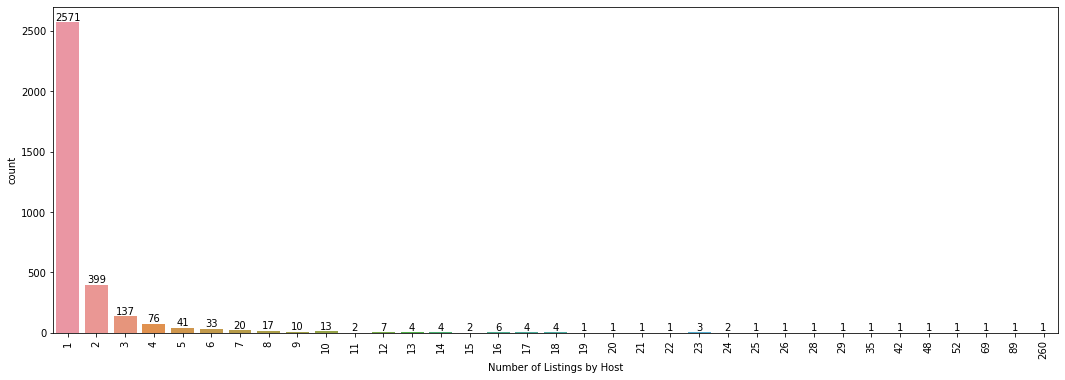

In [345]:
plt.figure(figsize=(18,6))
p = sb.countplot(x=listings_by_host, order=sorted(listings_by_host.unique()))
p.set_xticklabels(labels=p.get_xticklabels(),rotation=90)
p.bar_label(p.containers[0])
plt.xlabel('Number of Listings by Host')
plt.show()

It is obvious that a vast majority of hosts have only one listing in the Chicago area.  Let us look at the outliers.

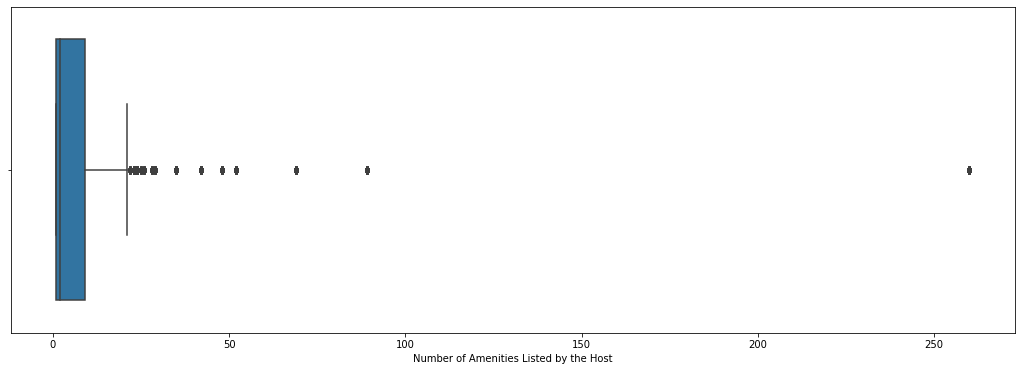

In [346]:
plt.figure(figsize=(18,6))
sb.boxplot(x=dat['calculated_host_listings_count'])
plt.xlabel('Number of Amenities Listed by the Host')
plt.show()

In [347]:
#Calculate the lower and upper quartile values
q1 = np.quantile(dat['calculated_host_listings_count'], 0.25)
q3 = np.quantile(dat['calculated_host_listings_count'], 0.75)
#calculate the upper whisker only, since no outliers are below the lower
whishi = q3 + 1.5*(q3-q1)
#create a dataframe where the income is higher than the upper whisker value
out_list = dat[dat['calculated_host_listings_count']>whishi]
print('The upper whisker on the box plot is at ' + str(whishi) + ', with ' +
      str(len(out_list['id'])) + ' listings as outliers past this value.')

The upper whisker on the box plot is at 21.0, with 842 listings as outliers past this value.


<h4>Listing License</h4>

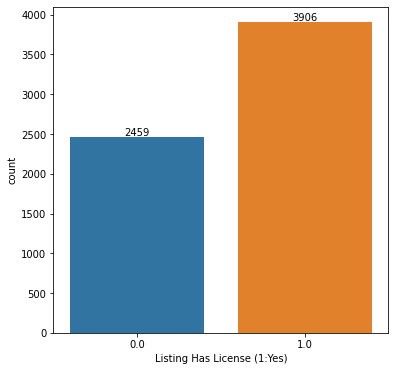

In [348]:
plt.figure(figsize=(6,6))
p = sb.countplot(x='license',data = dat)
p.bar_label(p.containers[0])
plt.xlabel('Listing Has License (1:Yes)')
plt.show()

A majority of the listings have a license, but it is not a large majority.

<h4>Host Response Time</h4>

In [349]:
dat['host_response_time'].unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

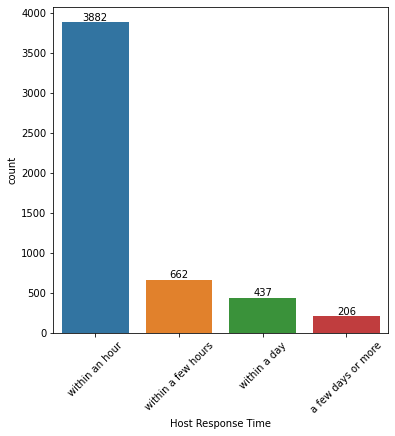

In [350]:
plt.figure(figsize=(6,6))
p = sb.countplot(x='host_response_time',data = dat)
p.set_xticklabels(labels=p.get_xticklabels(),rotation=45)
p.bar_label(p.containers[0])
plt.xlabel('Host Response Time')
plt.show()

Here we can see there are four categories for the response time.  Let's define a system for rating the response time by using floating numbers.  We will assign the values in hours and as follows:
 * 'within an hour' = 1 hour
 * 'within a few hours' = 5 hours
 * 'within a day' = 24 hours
 * 'a few days or more' = 48 hours

In [351]:
dat['host_response_time_float'] = dat['host_response_time'].map({'within an hour':1,'within a few hours':5,
                                                           'within a day':24,'a few days or more':48}).astype('float')
dat['host_response_time_float'].unique()

array([ 1.,  5., nan, 24., 48.])

<h4>Host Verifications</h4>

In order to simplify future analysis, let us count the number of verifications the host has and list this in a new column.

In [352]:
dat['host_verifications'].sample(5)

5627                                   ['email', 'phone']
156      ['email', 'phone', 'facebook', 'reviews', 'kba']
5339    ['email', 'phone', 'offline_government_id', 's...
5513    ['email', 'phone', 'reviews', 'manual_offline'...
2316    ['email', 'phone', 'reviews', 'jumio', 'kba', ...
Name: host_verifications, dtype: object

We can see that the verifications are separated by a comma, so we will use this to count the number of verifications each host has.

In [353]:
dat['no_of_verif'] = dat['host_verifications'].str.count(r',') + 1
dat.loc[:, ['host_verifications','no_of_verif']].head()

,host_verifications,no_of_verif
0,"['email', 'phone', 'reviews', 'manual_offline'...",6
1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",8
2,"['email', 'phone', 'reviews', 'jumio', 'govern...",6
3,"['email', 'phone', 'reviews', 'offline_governm...",7
4,"['email', 'phone', 'facebook', 'reviews', 'kba']",5


In order to catch any observations where hosts have no verifications, we will set the number of verifications to zero where the host_verifications = 'None'.  This is important since the code above would have counted both 'none' and an observation without a comma (i.e. only one verification) as 1.

In [354]:
dat['no_of_verif'] = np.where(dat['host_verifications'] == 'None', 0, dat['no_of_verif'])

In [355]:
dat['no_of_verif'].describe()

count    6365.000000
mean        5.586646
std         2.312465
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        12.000000
Name: no_of_verif, dtype: float64

On average, hosts have about 5-6 different identity verifications. 

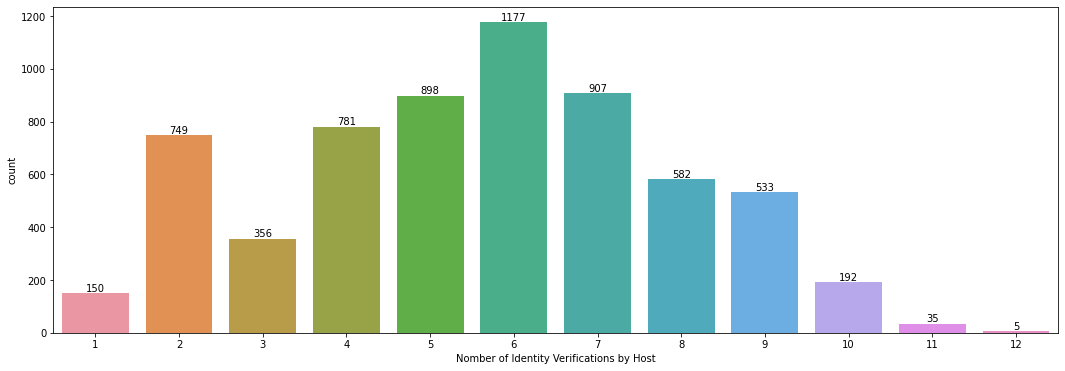

In [356]:
plt.figure(figsize=(18,6))
p = sb.countplot(x='no_of_verif',data = dat)
p.bar_label(p.containers[0])
plt.xlabel('Nomber of Identity Verifications by Host')
plt.show()

<h4>Amenities</h4>

Here we repeat the same process for number of amenities listed.

In [357]:
dat['no_of_amen'] = dat['amenities'].str.count(r',') + 1
dat.loc[:, ['amenities','no_of_amen']].head()

,amenities,no_of_amen
0,"[""Hot water kettle"", ""Wine glasses"", ""Kitchen""...",51
1,"[""Kitchen"", ""Free street parking"", ""Long term ...",30
2,"[""Kitchen"", ""Free street parking"", ""Shampoo"", ...",33
3,"[""Kitchen"", ""Long term stays allowed"", ""Smoke ...",31
4,"[""Free street parking"", ""Shampoo"", ""Smoke alar...",22


In [358]:
dat['no_of_amen'].describe()

count    6365.000000
mean       31.141241
std        10.613992
min         1.000000
25%        24.000000
50%        31.000000
75%        37.000000
max        82.000000
Name: no_of_amen, dtype: float64

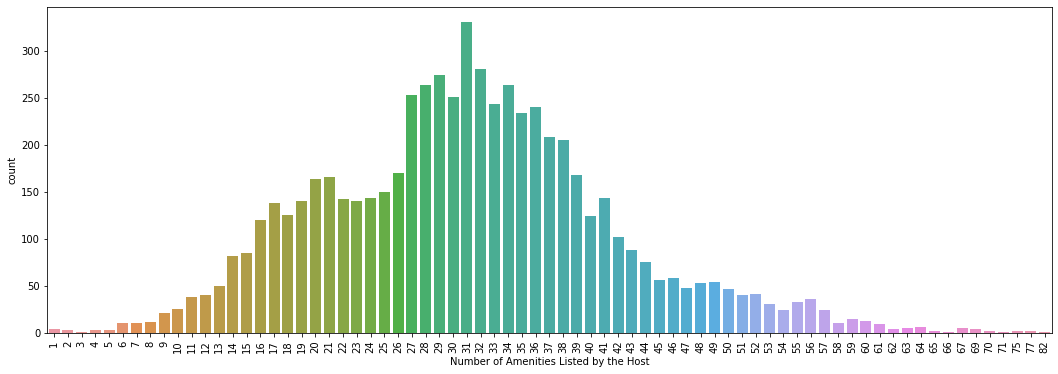

In [359]:
plt.figure(figsize=(18,6))
p = sb.countplot(x='no_of_amen',data = dat)
p.set_xticklabels(labels=p.get_xticklabels(),rotation=90)
plt.xlabel('Number of Amenities Listed by the Host')
plt.show()

Let us take a closer look to see what outliers are in this variable.

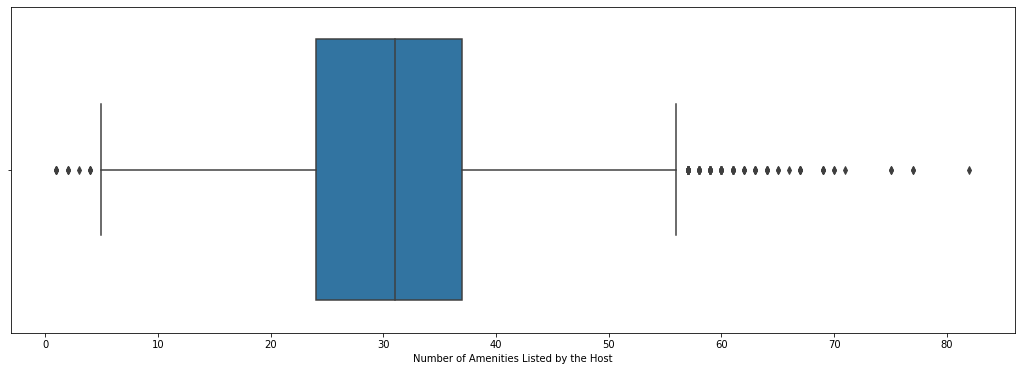

In [360]:
plt.figure(figsize=(18,6))
sb.boxplot(x=dat['no_of_amen'])
plt.xlabel('Number of Amenities Listed by the Host')
plt.show()

In [361]:
#Calculate the lower and upper quartile values
q1 = np.quantile(dat['no_of_amen'], 0.25)
q3 = np.quantile(dat['no_of_amen'], 0.75)
#calculate the upper whisker only, since no outliers are below the lower
whishi = q3 + 1.5*(q3-q1)
whislo = q1 - 1.5*(q3-q1)
#create a dataframe where the income is higher than the upper whisker value
out_list_hi = dat[dat['no_of_amen']>whishi]
out_list_lo = dat[dat['no_of_amen']<whislo]

print('\nThe upper whisker on the box plot is at ' + str(whishi) + ', with ' +
      str(len(out_list_hi['id'])) + ' listings as outliers above this value.')
print('\n')
print('The lower whisker on the box plot is at ' + str(whislo) + ', with ' +
      str(len(out_list_lo['id'])) + ' listings as outliers below this value.')


The upper whisker on the box plot is at 56.5, with 109 listings as outliers above this value.


The lower whisker on the box plot is at 4.5, with 11 listings as outliers below this value.


<h4>Distance from Center of Chicago</h4>

Let's calculate the distance of the listings from the center of the city of Chicago.  We will use the following coordinates: 41.8781° N, 87.6298° W (source needed?).

We will use the Haversine formula to calculate the distance in miles.  In order to do so, we will first define a function to perform the calculation.

In [362]:
# Coordinates for center of Chicago in degrees
lat1 = 41.881832
long1 = -87.623177

# Constant, radius of the Earth in miles
r = 3958.8

# Define a function to calculate the distance
def haversine(lat2, long2):
    # First convert degrees into radians:
    rlat1 = lat1 * (math.pi / 180)
    rlat2 = lat2 * (math.pi / 180)
    rlong1 = long1 * (math.pi / 180)
    rlong2 = long2 * (math.pi / 180)
    
    # Calculate the differnce between the latitudes and longitudes
    dlat = rlat1 - rlat2
    dlong = rlong1 - rlong2
    
    # Use the Haversine formula (broken into 3 terms for simplification here)
    a = (math.sin(dlat / 2) ** 2)         # First term
    b = math.cos(rlat1) * math.cos(rlat2) # Second term
    c = (math.sin(dlong / 2) ** 2)        # Third term
    e = math.sqrt(a + b * c)
    d = 2 * r * e                         # where r is the radius of the Earth
    return d

Then, apply the formula to each observation in the data set, returning the answer in a new column for the distance from the center of the city.

In [363]:
dat['d_center'] = dat.apply(
    lambda row: haversine(row['latitude'], row['longitude']),
    axis=1)
dat['d_center'].sample(5)

3980    1.141245
3107    0.754148
2921    3.742341
3916    1.228072
2861    1.453680
Name: d_center, dtype: float64

In [364]:
dat['d_center'].describe()

count    6365.000000
mean        4.382709
std         2.735817
min         0.091059
25%         2.182025
50%         4.095625
75%         6.078114
max        16.529282
Name: d_center, dtype: float64

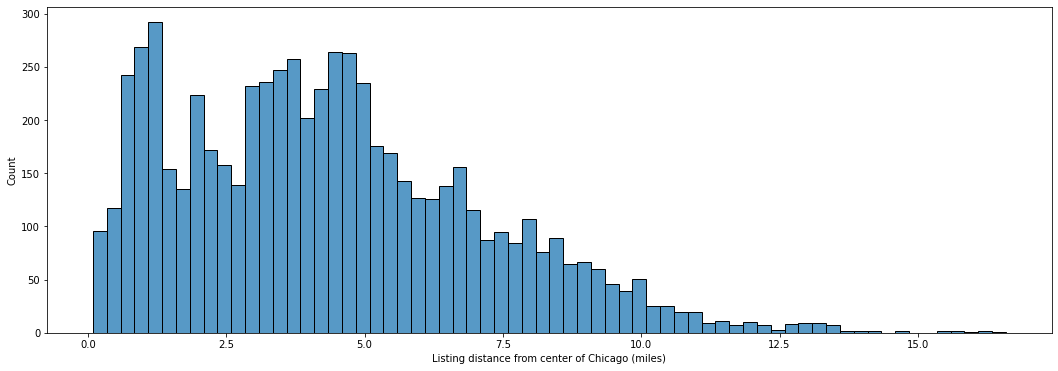

In [365]:
plt.figure(figsize=(18,6))
p = sb.histplot(x='d_center',data = dat,binwidth=0.25)
plt.xlabel('Listing distance from center of Chicago (miles)')
plt.show()

The plot shows a skew towards the center of the city, which makes sense that a larger number of listings would be closer to the center.

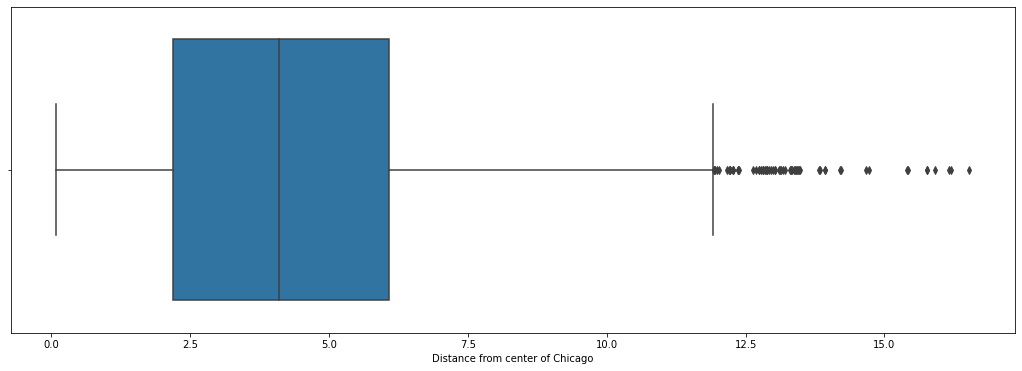

In [366]:
plt.figure(figsize=(18,6))
sb.boxplot(x=dat['d_center'])
plt.xlabel('Distance from center of Chicago')
plt.show()

In [367]:
#Calculate the lower and upper quartile values
q1 = np.quantile(dat['d_center'], 0.25)
q3 = np.quantile(dat['d_center'], 0.75)
#calculate the upper whisker only, since no outliers are below the lower
whishi = q3 + 1.5*(q3-q1)
whislo = q1 - 1.5*(q3-q1)
#create a dataframe where the income is higher than the upper whisker value
out_list_hi = dat[dat['d_center']>whishi]
out_list_lo = dat[dat['d_center']<whislo]

print('\nThe upper whisker on the box plot is at ' + str(round(whishi,2)) + ', with ' +
      str(len(out_list_hi['id'])) + ' listings as outliers above this value.')


The upper whisker on the box plot is at 11.92, with 64 listings as outliers above this value.


<h4>Property and Room Types</h4>

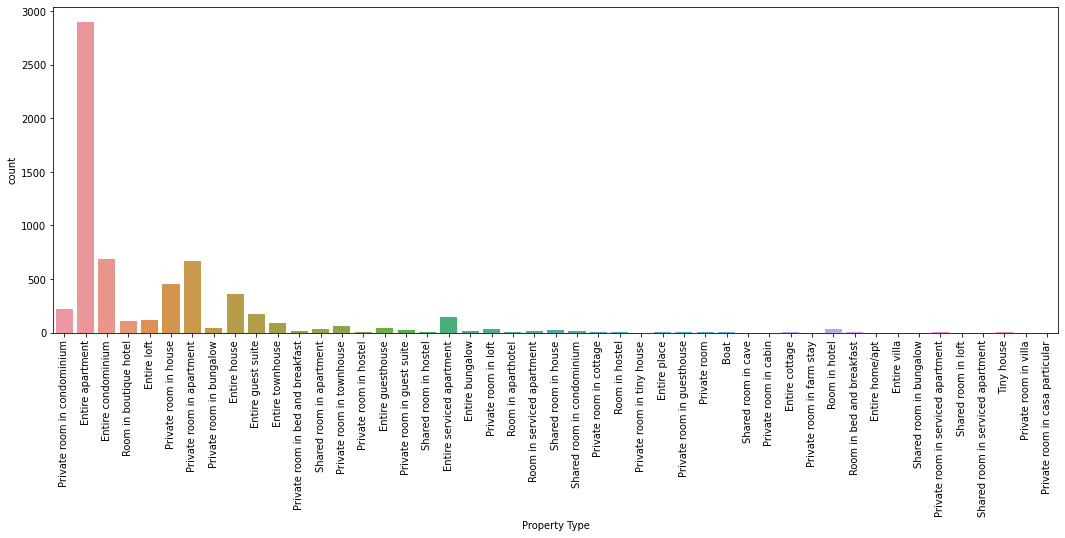

In [368]:
plt.figure(figsize=(18,6))
p = sb.countplot(x='property_type',data = dat)
p.set_xticklabels(labels=p.get_xticklabels(),rotation=90)
plt.xlabel('Property Type')
plt.show()

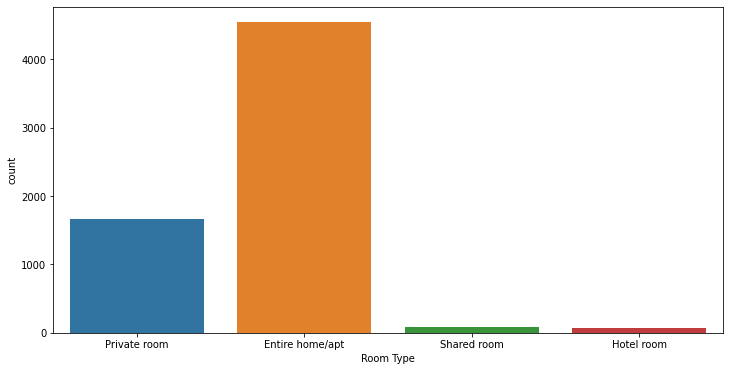

In [369]:
plt.figure(figsize=(12,6))
p = sb.countplot(x='room_type',data = dat)
plt.xlabel('Room Type')
plt.show()

In [370]:
print("The two graphs above show the most common type of listing is an entire apartment.  " + 
      "With the largest property type being 'entire apartment' at %s observations. \n"
     %(dat['property_type'].values == 'Entire apartment').sum())

print("In the room type category, there are %s observations for 'Entire home/apt'"
     %(dat['room_type'].values == 'Entire home/apt').sum())

The two graphs above show the most common type of listing is an entire apartment.  With the largest property type being 'entire apartment' at 2898 observations. 

In the room type category, there are 4541 observations for 'Entire home/apt'


<h3>Additional Box Plots</h3>

<h4>Price Outliers</h4>

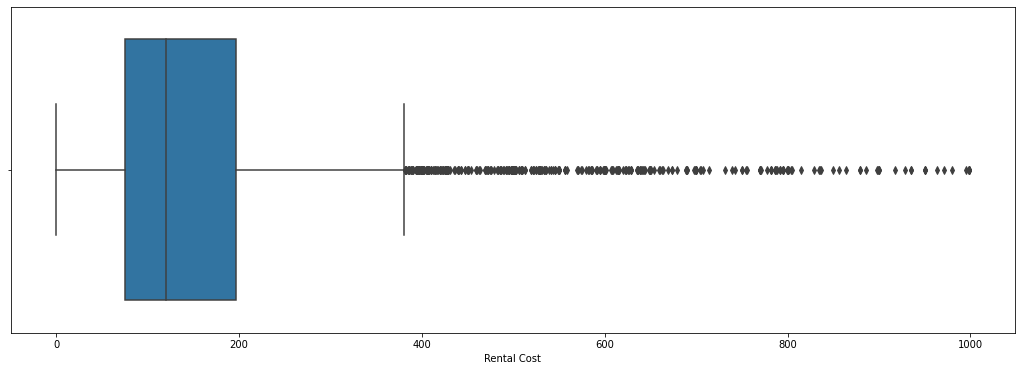

In [371]:
plt.figure(figsize=(18,6))
sb.boxplot(x=dat['price'])
plt.xlabel('Rental Cost')
plt.show()

In [372]:
#Calculate the lower and upper quartile values
q1 = np.quantile(dat['price'], 0.25)
q3 = np.quantile(dat['price'], 0.75)
#calculate the upper whisker only, since no outliers are below the lower
whishi = q3 + 1.5*(q3-q1)
#whislo = q1 - 1.5*(q3-q1)
#create a dataframe where the income is higher than the upper whisker value
out_list_hi = dat[dat['price']>whishi]
#out_list_lo = dat[dat['d_center']<whislo]

print('\nThe upper whisker on the box plot is at $' + str(whishi) + ', with ' +
      str(len(out_list_hi['id'])) + ' listings as outliers above this value.')


The upper whisker on the box plot is at $380.0, with 463 listings as outliers above this value.


<h3>Regression Plots</h3>

<h4>Price v. Distance from center of city</h4>

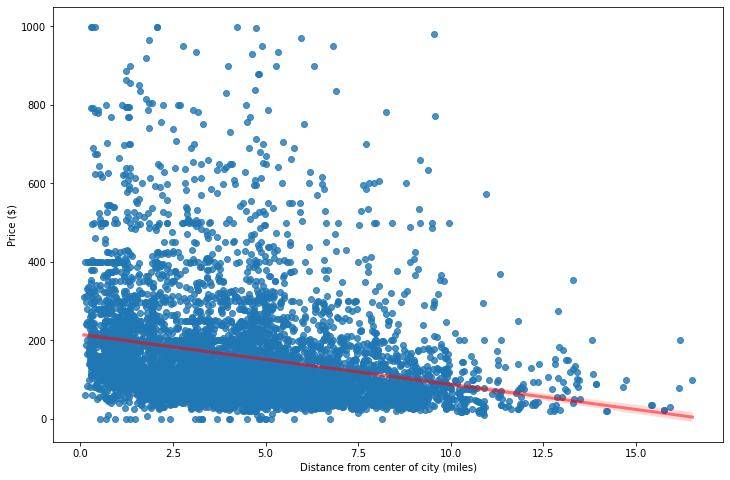

In [373]:
plt.figure(figsize=(12,8))
sb.regplot(x="d_center", y="price", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)
plt.xlabel('Distance from center of city (miles)')
plt.ylabel('Price ($)')
plt.show()

The regression plot shows a correlation between the distance from the center of the city and the price of the listing.  In general, the listings closer to the center of the city are worth more than the ones further away.  This makes sense, as property values are generally higher in more populated areas.

<h4>Price v. Number of Amenities</h4>

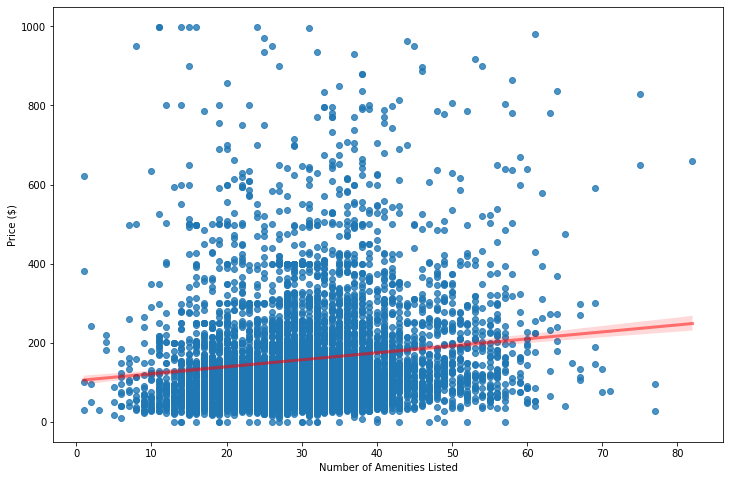

In [374]:
plt.figure(figsize=(12,8))
sb.regplot(x="no_of_amen", y="price", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)
plt.xlabel('Number of Amenities Listed')
plt.ylabel('Price ($)')
plt.show()

On average, the listings with more amenities listed are also posted for a higher rental price.

<h4>Average Rating v. Response Time</h4>

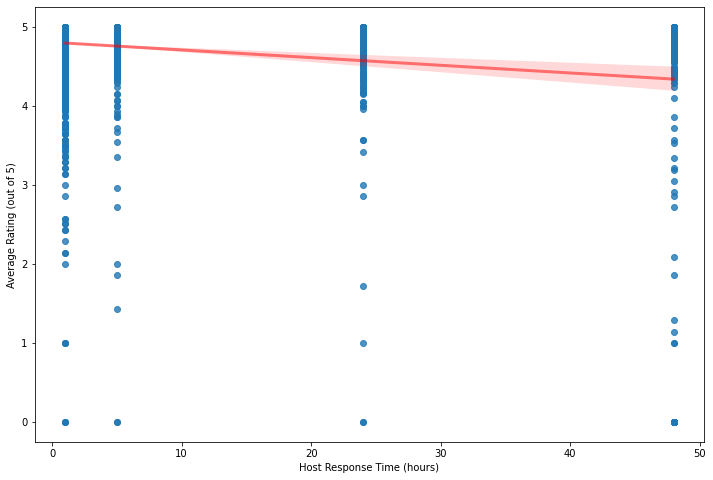

In [375]:
plt.figure(figsize=(12,8))
sb.regplot(x="host_response_time_float", y="avg_rating", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)
plt.xlabel('Host Response Time (hours)')
plt.ylabel('Average Rating (out of 5)')
plt.show()

The regression plot shows a negative trend in the average rating related to the time it takes the host to respond to messages and booking requests.

<h4>Average Rating v. Response Rate</h4>

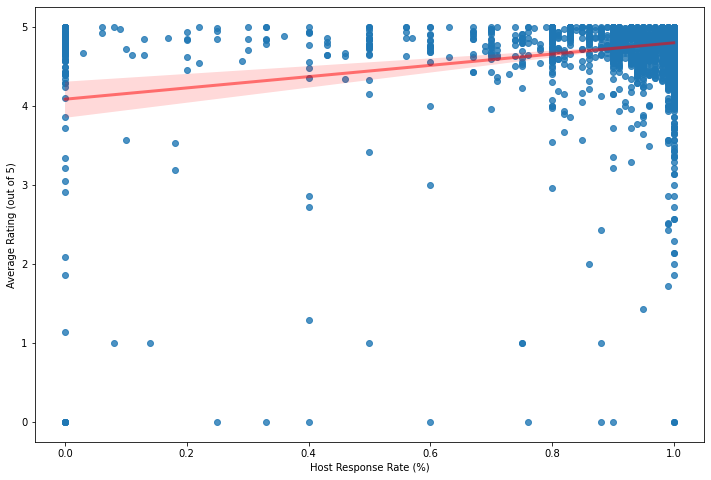

In [376]:
plt.figure(figsize=(12,8))
sb.regplot(x="host_response_rate", y="avg_rating", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Average Rating (out of 5)')
plt.show()

In general, the higher the hosts' response rate is, the higher their average listing rating is.

<h4>Average Rating v. Number of Verifications</h4>

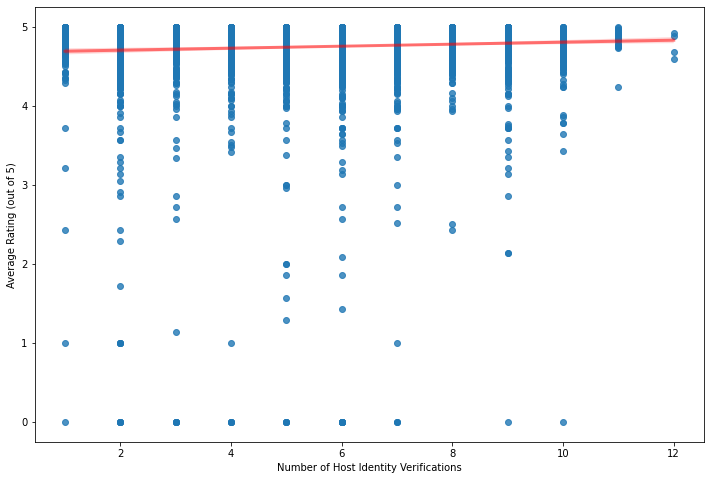

In [377]:
plt.figure(figsize=(12,8))
sb.regplot(x="no_of_verif", y="avg_rating", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)
plt.xlabel('Number of Host Identity Verifications')
plt.ylabel('Average Rating (out of 5)')
plt.show()

While it appears there is a positive correlation between the average rating and the number of verifications a host has, it is very small.

<h3>Word Clouds</h3>

Some of the columns are free text entered by the hosts.  We will look at the word clouds to explore which keywords are used most frequently.  The data fields we will focus on are:
- 'description': this is the hosts' description of their listings
- 'neighborhood_overview': the hosts' description of the neighborhood
- 'host_about': the hosts' description of themselves

First, let's define a function to make it easy to generate our wordclouds from the input column:

In [378]:
stopwords = STOPWORDS
stopwords.update(['description','neighborhood_overview','object','dtype','host_about',
                 'inv','t','name','don','neig','m','o','neig','nei'])
def Mywordcloud(data, title = None):   
    wc = WordCloud(
    background_color = "white",
    stopwords = stopwords,
    height = 600,
    width = 600
    ).generate(str(data))
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wc)
    plt.show()

<h4>Listing Description</h4>

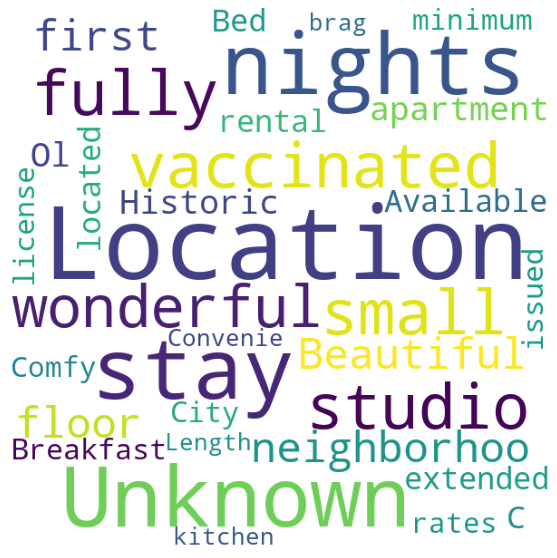

In [379]:
Mywordcloud(dat['description'].dropna())

<h4>Neighborhood Overview</h4>

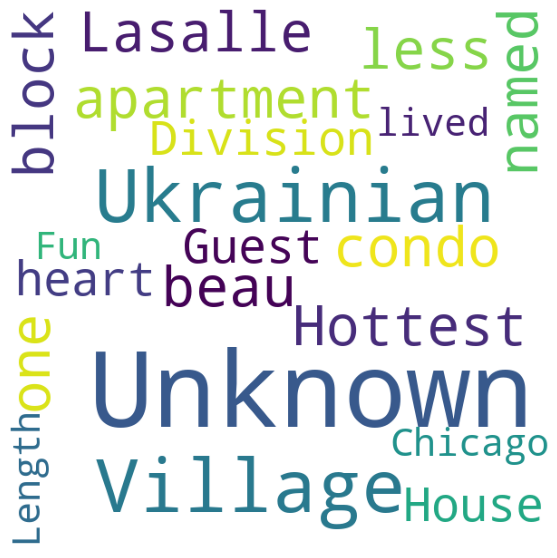

In [380]:
Mywordcloud(dat['neighborhood_overview'].dropna())

<h4>About the Host</h4>

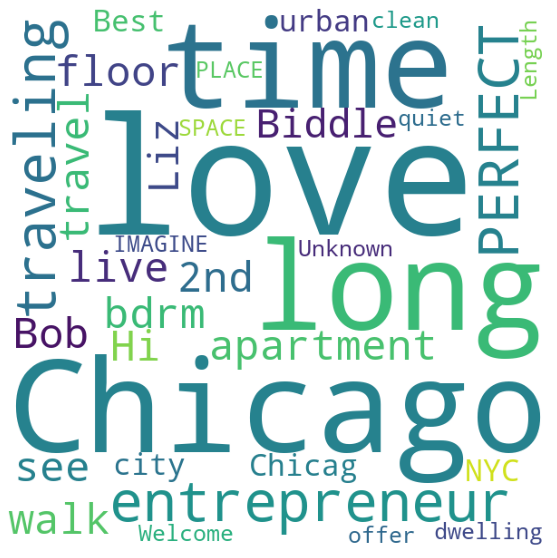

In [381]:
Mywordcloud(dat['host_about'].dropna())

<h3>Joint Plots</h3>

<h4>Distance center from the city vs. Average rating</h4>

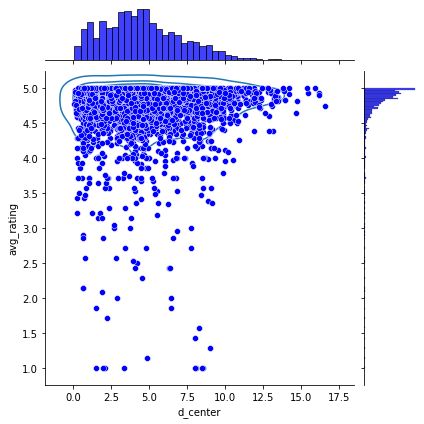

In [382]:
non_zero_avg = dat[dat['avg_rating']>0]
ax = sb.jointplot(x="d_center", y="avg_rating", data=non_zero_avg[['d_center','avg_rating']],color='b')
ax.plot_joint(sb.kdeplot, zorder=0, n_levels=6)
plt.xlabel('Distance from the center of Chicago')
plt.ylabel('Average Rating (out of 5)')
plt.show()

According to above plot, customers tend to rate the places that are closing to the center of Chicago with the score from 4 to 5 rating.

<h4>Distance center from the city vs. Average rating</h4>

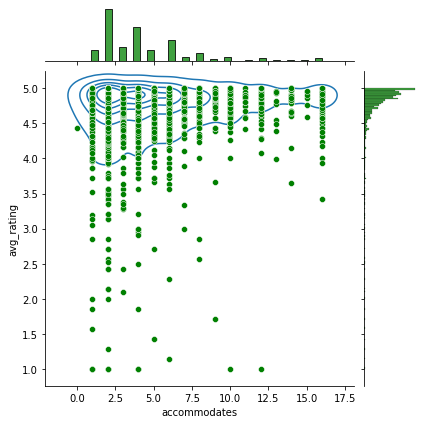

In [383]:
ax = sb.jointplot(x="accommodates", y="avg_rating", data=non_zero_avg[['accommodates','avg_rating']],color='g')
ax.plot_joint(sb.kdeplot, zorder=0, n_levels=6)
plt.xlabel('Accomodates (people)')
plt.ylabel('Average Rating (out of 5)')
plt.show()

Smaller accommodations tend to have higher average of rating score.

<h4>Accomodation vs. Availability for 30 days</h4>

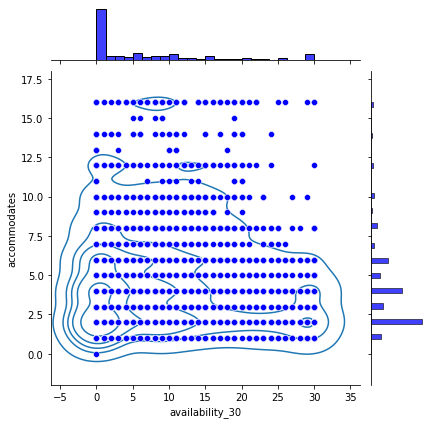

In [384]:
ax1 = sb.jointplot(x="availability_30", y="accommodates", data=dat[['availability_30','accommodates']],color='b')
ax1.plot_joint(sb.kdeplot, zorder=0, n_levels=6)
plt.xlabel('Availabillity Next 30d')
plt.ylabel('Accomodates (people)')
plt.show()

According to above plot, we can see there are big density starting from bottom left corner and spreading to the top and right. We can see that smaller accommodations have lower chance of being availability in 30 days.

<h4>Accommodation vs. Distance from center of Chicago</h4>

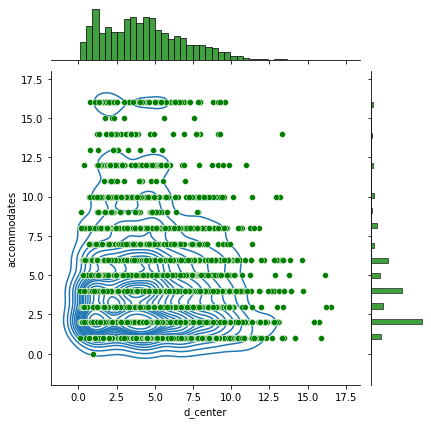

In [385]:
ax = sb.jointplot(x="d_center", y="accommodates", data=dat[['d_center','accommodates']],color='g')
ax.plot_joint(sb.kdeplot, zorder=0, n_levels=17)
plt.xlabel('Distance from the center of Chicago')
plt.ylabel('Accomodates (people)')
plt.show()

We can see that smaller accommodations tend to stay close to the city.

<h3>Heat Map</h3>

In [417]:
#starting lat and long are center of chicago
lat1 = 41.881832
long1 = -87.623177
map = folium.Map(location=[lat1, long1], zoom_start=10)
#convert data into list format
heat_data = [[row['latitude'],row['longitude'],row['price']] for index, row in dat.iterrows()]
#add to map, gradient for the price value
map.add_child(HeatMap(heat_data, radius = 15, gradient={'0':'Navy', '0.25':'Blue','0.50':'Green', '0.75':'Yellow','1': 'Red'}))
map

<h2 align='center'>Dimension Reduction</h2>

In [386]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6365 entries, 0 to 6365
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            6365 non-null   int64         
 1   last_scraped                                  6365 non-null   datetime64[ns]
 2   name                                          6365 non-null   object        
 3   description                                   6365 non-null   object        
 4   neighborhood_overview                         6365 non-null   object        
 5   host_id                                       6365 non-null   int64         
 6   host_name                                     6365 non-null   object        
 7   host_since                                    6365 non-null   datetime64[ns]
 8   host_location                                 6365 non-null   object

<h3>Principal Component Analysis</h3>

In order to complete a Principal Component Analysis, we need to only select the numeric non-datetime) values and drop values with NaNs.

In [387]:
# Select only numeric values
dat_pre_norm = dat.select_dtypes(exclude=['object'])

# Cannot scale datetime objects, so remove those columns
dat_pre_norm = dat_pre_norm.drop(['first_review','last_review','host_since','last_scraped'],axis=1)

# Drop off id columns
dat_pre_norm = dat_pre_norm.drop(['id','host_id'],axis=1)

# Drop remaining NaN values
dat_pre_norm = dat_pre_norm.dropna()

Next we will scale the data.

In [388]:
dat_norm = scale(dat_pre_norm)

<h4>PCA with all variables</h4>

For the fist PCA, we will include all of the variables (i.e. all columns from the selection above).

In [389]:
pca1 = PCA(n_components=len(dat_pre_norm.columns))

pca1.fit(dat_norm)

PCA(n_components=49)

In [390]:
var = pca1.explained_variance_ratio_
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(var1)

[ 15.23  24.39  32.16  39.3   45.84  51.22  55.54  59.06  62.25  65.38
  67.76  69.99  72.13  74.19  76.23  78.2   80.09  81.89  83.59  85.25
  86.8   88.13  89.39  90.49  91.51  92.41  93.26  94.06  94.78  95.45
  96.02  96.48  96.9   97.32  97.71  98.09  98.44  98.78  99.08  99.36
  99.62  99.83  99.98 100.03 100.03 100.03 100.03 100.03 100.03]


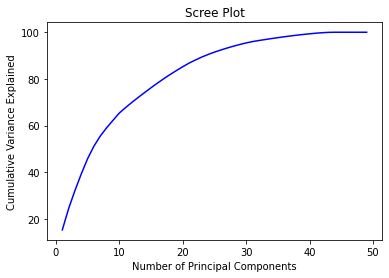

In [391]:
var1 = pd.DataFrame(var1, index=np.arange(1,int(len(dat_pre_norm.columns))+1))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

<h4>PCA with 80% variance explained</h4>

Taking the first 17 principal components will correspond to 80% of the variance explained.

In [392]:
pca17 = PCA(n_components=17)
pca17.fit(dat_norm)
data_pca17 = pca17.transform(dat_norm)

# Convert the numpy array to pandas DataFrame
data_pca17 = pd.DataFrame(data_pca17)
data_pca17.columns = ["PC"+str(i) for i in range(1,18)]

In [393]:
data_pca17.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PC1,1.000000e+00,-3.046603e-11,1.685710e-12,6.165028e-11,9.950527e-11,-3.411804e-10,-4.292295e-11,3.424855e-10,-1.472385e-11,6.287538e-10,3.091001e-09,-1.976356e-10,2.230543e-09,3.402586e-11,9.684783e-09,2.854220e-10,-5.709919e-09
PC2,-3.046603e-11,1.000000e+00,4.858403e-10,2.099504e-09,-7.323531e-09,2.373439e-08,3.616515e-08,-6.765196e-08,3.437153e-08,-8.466588e-08,-7.802249e-08,3.297179e-07,1.012504e-06,2.137579e-07,3.745365e-07,5.207894e-07,6.836118e-07
PC3,1.685710e-12,4.858403e-10,1.000000e+00,9.889912e-10,-1.445519e-09,4.368589e-09,1.065763e-08,-1.779053e-08,1.181613e-08,-1.818440e-08,-3.966047e-09,1.079723e-07,2.868870e-07,4.844060e-08,1.703352e-07,1.436880e-07,1.502955e-07
PC4,6.165028e-11,2.099504e-09,9.889912e-10,1.000000e+00,-6.126408e-09,1.782733e-08,6.295085e-08,-9.956008e-08,6.636989e-08,-9.812658e-08,7.453579e-08,6.138726e-07,1.852940e-06,2.777289e-07,1.291459e-06,8.846391e-07,7.836717e-07
PC5,9.950527e-11,-7.323531e-09,-1.445519e-09,-6.126408e-09,1.000000e+00,-7.302902e-08,-1.119705e-07,2.116878e-07,-1.077855e-07,2.576382e-07,2.278885e-07,-1.017756e-06,-3.074717e-06,-5.594063e-07,-1.107552e-06,-1.556070e-06,-2.088748e-06
PC6,-3.411804e-10,2.373439e-08,4.368589e-09,1.782733e-08,-7.302902e-08,1.000000e+00,3.419002e-07,-6.543150e-07,3.090858e-07,-8.411645e-07,-8.061918e-07,3.014686e-06,9.707492e-06,2.022886e-06,3.215357e-06,4.968888e-06,6.771652e-06
PC7,-4.292295e-11,3.616515e-08,1.065763e-08,6.295085e-08,-1.119705e-07,3.419002e-07,1.000000e+00,-1.352515e-06,8.244950e-07,-1.362353e-06,-2.086279e-07,7.508357e-06,2.054199e-05,2.149665e-06,1.107866e-05,9.818989e-06,1.131960e-05
PC8,3.424855e-10,-6.765196e-08,-1.779053e-08,-9.956008e-08,2.116878e-07,-6.543150e-07,-1.352515e-06,1.000000e+00,-1.405738e-06,2.515084e-06,7.032848e-07,-1.279440e-05,-3.591078e-05,-3.539038e-06,-1.772969e-05,-1.713662e-05,-2.075837e-05
PC9,-1.472385e-11,3.437153e-08,1.181613e-08,6.636989e-08,-1.077855e-07,3.090858e-07,8.244950e-07,-1.405738e-06,1.000000e+00,-1.185988e-06,-6.125529e-08,8.828535e-06,1.929540e-05,1.009669e-06,1.173030e-05,9.093583e-06,9.913340e-06
PC10,6.287538e-10,-8.466588e-08,-1.818440e-08,-9.812658e-08,2.576382e-07,-8.411645e-07,-1.362353e-06,2.515084e-06,-1.185988e-06,1.000000e+00,2.023143e-06,-1.180975e-05,-4.102739e-05,-8.698210e-06,-1.709998e-05,-2.067776e-05,-2.563894e-05


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

<h4>PCA with 2 components</h4>

In [394]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(dat_norm)
dat_pca2 = pca2.fit_transform(dat_norm)

dat_pca2 = pd.DataFrame(dat_pca2)
dat_pca2.columns = ["PC"+str(i) for i in range(1,3)]

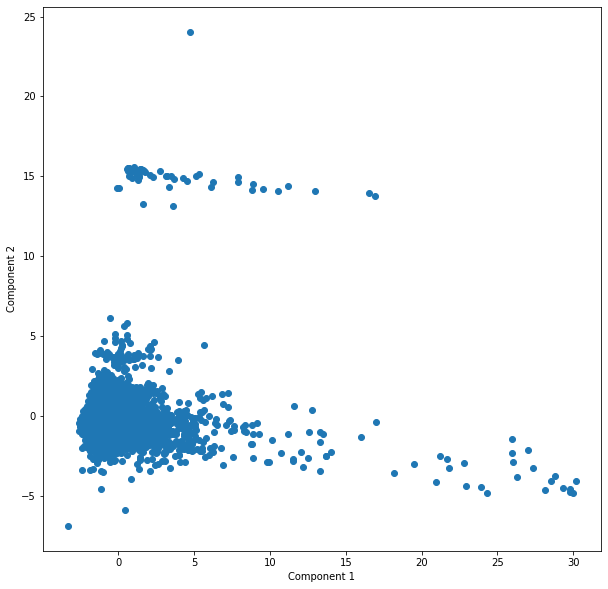

In [395]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(dat_pca2['PC1'], dat_pca2['PC2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()